# Sentiment Analysis on Movie Reviews using LSTM

In [1]:
# Import the required libraries - NumPy, pandas, Matplotlib, TensorFlow and scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Dataset - Paste the location of the IMDb csv file
file_path = r'C:\Users\krish\OneDrive\Desktop\Projects\Sentiment Analysis on Movie Reviews\IMDb Dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Preprocess the data - Tokenize the text data, convert reviews to sequences of integers and pad them to a uniform length
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])
maxlen = 100
x = pad_sequences(sequences, maxlen=maxlen)
y = data['sentiment'].map({'positive': 1, 'negative': 0}).values

In [4]:
# Load GloVe embeddings into a dictionary where each word is mapped to its embedding vector
embedding_dim = 100
embedding_index = {}
glove_file_path = r'C:\Users\krish\OneDrive\Desktop\Projects\glove.6B.100d.txt'
with open(glove_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [5]:
# Create an embedding matrix where each word in the vocabulary is mapped to its GloVe embedding vector
word_index = tokenizer.word_index
vocab_size = min(5000, len(word_index) + 1)
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [6]:
# Split Data into Train (80%) and Test Sets (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Build the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=maxlen, trainable=False))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Visualizing training accuracy and loss over epochs

In [8]:
# Train the LSTM model with the training data (x_train, y_train) for 5 epochs
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 120ms/step - accuracy: 0.6412 - loss: 0.6209 - val_accuracy: 0.7971 - val_loss: 0.4383
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 106ms/step - accuracy: 0.7830 - loss: 0.4582 - val_accuracy: 0.8260 - val_loss: 0.3831
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 141ms/step - accuracy: 0.8114 - loss: 0.4083 - val_accuracy: 0.8442 - val_loss: 0.3515
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.8268 - loss: 0.3824 - val_accuracy: 0.8518 - val_loss: 0.3334
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 281ms/step - accuracy: 0.8401 - loss: 0.3555 - val_accuracy: 0.8539 - val_loss: 0.3280


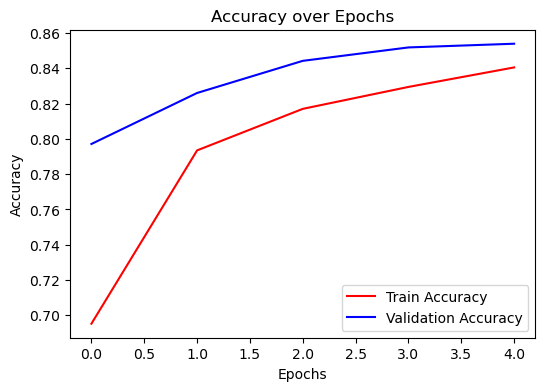

In [9]:
# Accuracy over Epochs graph plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

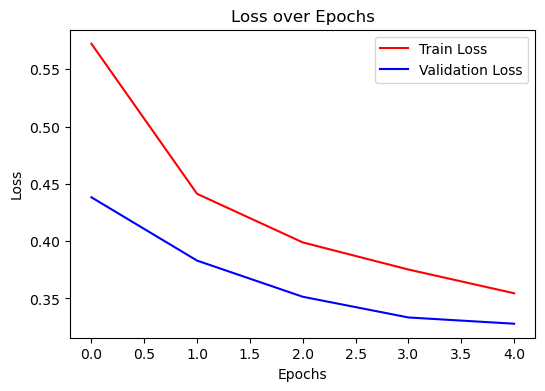

In [10]:
# Loss over Epochs graph plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluating the model on the test dataset and providing the accuracy, precision, recall, and F1-score

In [11]:
# Evaluate the Model - Finding out the accuracy, precision, recall and F1 score of negative sentiment and positive sentiment 
y_pred = (model.predict(x_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy of the model is: {accuracy}')
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
The accuracy of the model is: 0.8539
              precision    recall  f1-score   support

    negative       0.89      0.81      0.85      4961
    positive       0.83      0.90      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



## Classifying movie reviews as positive or negative

In [13]:
# Predict sentiment of new reviews
def predict_sentiment(review):
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
  return sentiment

# Take 3 example reviews
example_reviews = [
    "This movie was fantastic. I loved it.", # Positive Sentinemnt
    "This movie was not that good", # Negative Sentinemnt
    "This movie was ok but not that good." # Negative Sentinemnt
]

# Printing the sentinment result
for review in example_reviews:
    print(f"Review: {review}")
    print(f"Sentiment: {predict_sentiment(review)}")

Review: This movie was fantastic. I loved it.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Sentiment: Positive
Review: This movie was not that good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Sentiment: Negative
Review: This movie was ok but not that good.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Sentiment: Negative
